<a href="https://colab.research.google.com/github/gnaneswar-18/decision-tree-1/blob/main/lab_7(ds_tree_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/labs/Enjoy sports.csv")
print(len(data))
print(data.keys()[1:])


14
Index(['Outlook', 'Temp.', 'Humidity', 'Wind', 'Decision'], dtype='object')


In [ ]:
import numpy as np
import pandas as pd
def entropy(data):
    values, counts = np.unique(data, return_counts=True)
    probs = counts / len(data)
    return -np.sum(probs * np.log2(probs))
def values(attr):
  ls=[]
  for x in attr:
    if x not in ls:
      ls.append(x)
  return ls

def info_gain(x, y, feature):
    unique_val =values(x[:, feature])
    feature_entropy = 0
    for val in unique_val:
        y_count = y[x[:, feature] == val]
        feature_entropy += len(y_count) / len(y) * entropy(y_count)
    return entropy(y) - feature_entropy

def best_feature(x, y):
    gain = [info_gain(x, y, i) for i in range(x.shape[1])]
    return np.argmax(gain)

def decision_tree(x, y):
    if len(values(y)) == 1:
        return values(y)[0]
    best_feat = best_feature(x, y)
    tree = {best_feat: {}}
    for val in values(x[:, best_feat]):
        sub_x = x[x[:, best_feat] == val]
        sub_y = y[x[:, best_feat] == val]
        tree[best_feat][val] = decision_tree(np.delete(sub_x, best_feat, axis=1), sub_y)
    return tree

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/labs/Enjoy sports.csv')
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
dec_tree = decision_tree(x, y)
print(dec_tree)



{0: {1: 'No', 2: 'No', 3: 'Yes', 4: 'Yes', 5: 'Yes', 6: 'No', 7: 'Yes', 8: 'No', 9: 'Yes', 10: 'Yes', 11: 'Yes', 12: 'Yes', 13: 'Yes', 14: 'No'}}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def entropy(data):
  d=data.iloc[:,-1]
  d=d.value_counts()
  s=0;
  for v in d.keys():
    p=d[v]/sum(d);
    s-=p*np.log2(p);
  return s

In [ ]:
def ig(data,a):
  es=entropy(data)
  val=values(data[a])
  sc=data[a].value_counts()
  sv=[]
  for v in range(len(val)):
    temp_data=data[data[a]==val[v]]
    s=0;
    for res in values(data.iloc[:,-1]):
      try:
        pi=temp_data.iloc[:,-1].value_counts()[res]/len(temp_data)
        s-=pi*np.log2(pi)
      except:
        s=0
    sv.append(s)
  for i in range(len(val)):
    es-=sc[val[i]]*sv[i]/sum(sc)
  print(es)

ig(data,'Outlook')

0.24674981977443927


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import graphviz

le=LabelEncoder()
data['Outlook']=le.fit_transform(data['Outlook'])
data['Temp.']=le.fit_transform(data['Temp.'])
data['Wind']=le.fit_transform(data['Wind'])
data['Humidity']=le.fit_transform(data['Humidity'])
data['Decision']=le.fit_transform(data['Decision'])
print(data)

    Day  Outlook  Temp.  Humidity  Wind  Decision
0     1        2      1         0     1         0
1     2        2      1         0     0         0
2     3        0      1         0     1         1
3     4        1      2         0     1         1
4     5        1      0         1     1         1
5     6        1      0         1     0         0
6     7        0      0         1     0         1
7     8        2      2         0     1         0
8     9        2      0         1     1         1
9    10        1      2         1     1         1
10   11        2      2         1     0         1
11   12        0      2         0     0         1
12   13        0      1         1     1         1
13   14        1      2         0     0         0


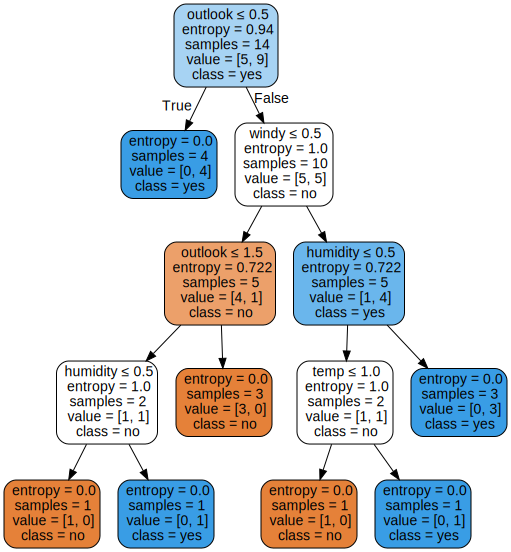

In [ ]:
x=data[['Outlook','Temp.','Humidity','Wind']]
y=data['Decision']
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(x,y)


dot_data=export_graphviz(tree,out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

dot_data =export_graphviz(tree, out_file=None, feature_names=

['outlook', 'temp', 'windy', 'humidity'], class_names=

['no', 'yes'], filled=True, rounded=True,

special_characters=True)

graph= graphviz.Source(dot_data)

graph